## Preprocessing practice with Adult data

Now it is time to try ourselves so let us use the Adult data again to do some FC/FS, etc.  Reload libraries and data as we did in the cleaning lab.  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Setup complete.")

Setup complete.


## Loading the data
Now we begin by loading the data as we have done before and printing the `.head()` to inspect the data.  Load the data as the Adult_data data frame. We will use that through the lab. You have already explored this dataset in detail so you know already quite a bit about it, hopefully!


In [4]:
#designate the path where you saved your Adult data
Adult_data_path = "/Users/bli/Desktop/JupiterProjects/JupiterLabs/Datasets/Adult.csv"

#Load the data using pandas read_csv function. This will generate a data frame we will use through the lab.
Adult_data = pd.read_csv(Adult_data_path)

#Show the first few records to check data is loading correctly
Adult_data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## Data exploration

Let us examine what type of attributes may be to understand which are non numeric and may need encoding.

In [7]:
Adult_data.info()
Adult_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


(48842, 15)

We can now divide our columns in to the categorical and numerical columns. Make a list of categorical and numerical columns.  We may already discard 'fnlwgt' at this stage as it is not a useful variable for the prediction of income.  We can exclude it here.  

In [9]:
CAT_COLUMNS = ["workclass", "education", "marital-status", "occupation",
                       "relationship", "race", "gender", "native-country"]
NUM_COLUMNS = ["age", "educational-num", "capital-gain", "capital-loss",
                      "hours-per-week"]

For the categorical values, we can find the number of unique fields in each to understand the different types of encodings that we may apply.  If we have too many unique values then hot-encoding may not be right and we may use a `ordinal encoding` instead.   

In [11]:
#Let us run loop of value_counts of each column to find out unique values. 
for col in Adult_data[CAT_COLUMNS]:
    print ("---- %s ---" % col)
    print (Adult_data[col].value_counts())

---- workclass ---
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64
---- education ---
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64
---- marital-status ---
marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64
---- occupation ---
oc

## Feature construction

One column that we could transform is _native-country_ as it has too many values to be useful.  Let us first visualise it against the decision or target variable _income_.

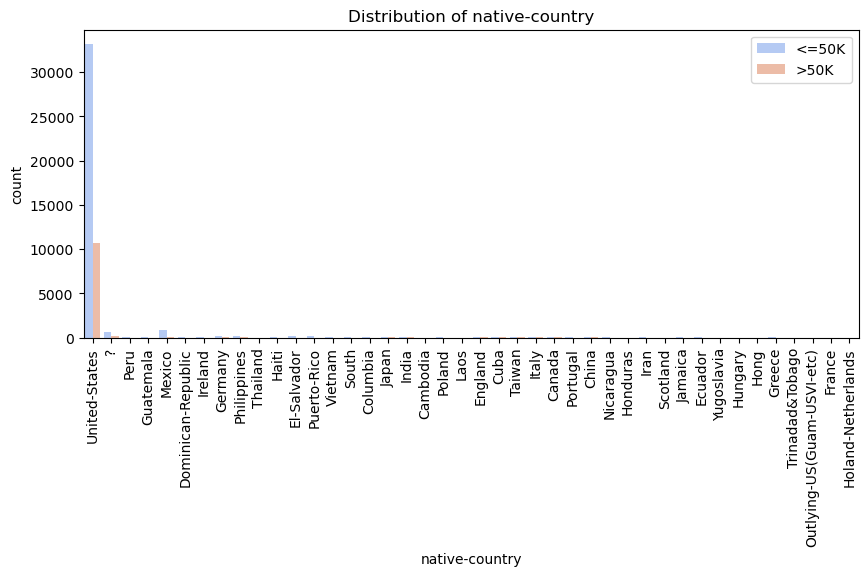

In [13]:
def DistPlot(df,hue,column):
    """ Make distribution plots of df for a defined column using hue"""
    plt.figure(figsize=(10,4))
    plt.xticks(rotation=90) 
    # produce a plot f
    sns.countplot(x=column, hue=hue,palette="coolwarm", data=df)
    #include a dynamic title
    plt.title("Distribution of " +column)
     #include a legend
    plt.legend()
    return
DistPlot(Adult_data,'income','native-country')

It is clear that it has to many not particularly useful values.  We could convert this to a variable that has a value of 1 if the person has 'United_States' as 'native-country' and 0 for all others.  So we count those born in the USA against all others.  Transform the variable in this way. 

In [15]:
# I will do this in the same variable by transform in it but you could create a new one.

Adult_data["native-country"] = np.where(Adult_data["native-country"].str.contains("United-States"), 1, 0)
print(Adult_data['native-country'].dtypes)

int64


Now visualise it again, against the target variable. 

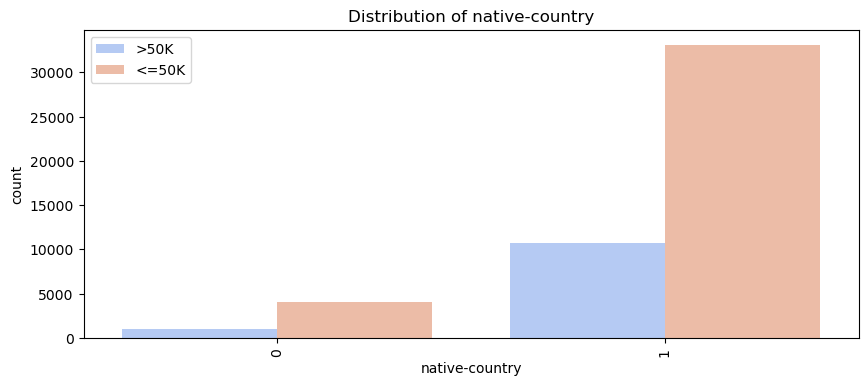

In [17]:
DistPlot(Adult_data,'income','native-country')

We can also perhaps combine _capital_gain_ and _capital-loss_ into a more useful variable.  Let us see what there values may look like against one another.  We can do this by creating a scatterplot to show _capital_gain_ against _capital-loss_. 

<Axes: xlabel='capital-gain', ylabel='capital-loss'>

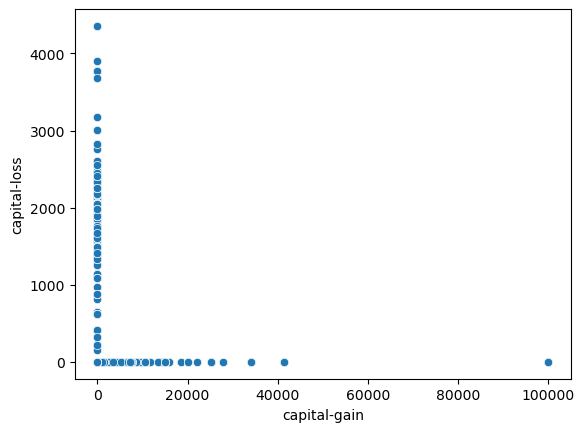

In [19]:

sns.scatterplot(x=Adult_data['capital-gain'], y=Adult_data['capital-loss'])

It seems to show that when _capital-loss_ has a non zero value _capital-gain_ is zero and viceversa.  To make sure this is the case, let us select any records which have both  _capital_gain_ and _capital-loss_ as positive values. 

In [21]:
Adult_data.loc[(Adult_data['capital-gain']>0) & (Adult_data['capital-loss']>0)]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income


Since there are no records, we could transform these two into a new variable, say _GainLoss_ which has a value of -1 if the person reported any _capital-loss_, 1, if they reported a _capital-gain_ and 0 of they reported neither.  

In [23]:
# I am doing the transformation in steps though you may do it all at once.
# That way I aso transform the gains and loses into a binary set of values.  
Adult_data["Gain"] = np.where(Adult_data["capital-gain"]>0, 1, 0)
Adult_data["Loss"] = np.where(Adult_data["capital-loss"]>0, -1, 0)
Adult_data["GainLoss"]= Adult_data["Gain"]+Adult_data["Loss"]
Adult_data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,Gain,Loss,GainLoss
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,1,<=50K,0,0,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,1,<=50K,0,0,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,1,>50K,0,0,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,1,>50K,1,0,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,1,<=50K,0,0,0


We can now visualise values for the new variable against the _income_.

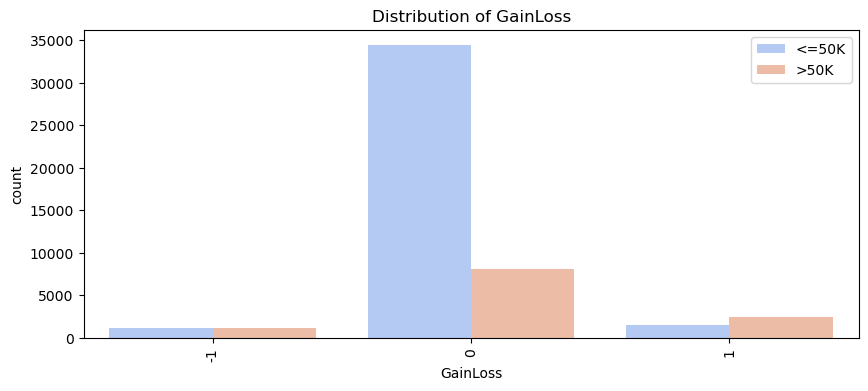

In [25]:
DistPlot(Adult_data,'income','GainLoss')

## Categorical encoding
So we have transformed or created a couple of variables.  What categorical variables are now left in the data frame? 

In [27]:
Adult_data.select_dtypes(include=['object']).columns


Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'income'],
      dtype='object')

Choose some of those to be encoded with an `OrdinalEncoder` and perform the encoding.  Put the encoded new variables along with the other data in a new data frame called `X`.  I will leave the smallest 3 in terms of list amount of unique values for `OneHotEncoding`.

In [29]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [30]:

import category_encoders as ce

#We establish the Ordinal encoder which will convert each categorical label to a number
# We specify the columns we want to transform, we ask it to handle missing values if any and also to return a dataframe instead of an np array
enc = ce.OrdinalEncoder(cols=['workclass', 'education', 'marital-status', 'occupation'],handle_missing='return_nan',return_df= True)

#We now fit the model and transform the data and put it in X which is a dataframe
X=enc.fit_transform(Adult_data)
type(X)

pandas.core.frame.DataFrame

Now look at the contents of X so far. 

In [32]:
X.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,Gain,Loss,GainLoss
0,25,1.0,226802,1.0,7,1.0,1.0,Own-child,Black,Male,0,0,40,1,<=50K,0,0,0
1,38,1.0,89814,2.0,9,2.0,2.0,Husband,White,Male,0,0,50,1,<=50K,0,0,0
2,28,2.0,336951,3.0,12,2.0,3.0,Husband,White,Male,0,0,40,1,>50K,0,0,0
3,44,1.0,160323,4.0,10,2.0,1.0,Husband,Black,Male,7688,0,40,1,>50K,1,0,1
4,18,3.0,103497,4.0,10,1.0,4.0,Own-child,White,Female,0,0,30,1,<=50K,0,0,0


Let us perform `OneHotEncoding` for some other variables such as _gender_.  Append the new variables to _X_.

In [35]:
from sklearn.preprocessing import OneHotEncoder

# Creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')

# Fitting and transforming the gender column
enc_df = pd.DataFrame(enc.fit_transform(X[['gender']]).toarray())

# Assign proper column names using get_feature_names_out
enc_df.columns = enc.get_feature_names_out(['gender'])

# Print the encoded DataFrame
print(enc_df)

# Concatenate with the original data
X = pd.concat([X, enc_df], axis=1)
print(X)


       gender_Female  gender_Male
0                0.0          1.0
1                0.0          1.0
2                0.0          1.0
3                0.0          1.0
4                1.0          0.0
...              ...          ...
48837            1.0          0.0
48838            0.0          1.0
48839            1.0          0.0
48840            0.0          1.0
48841            1.0          0.0

[48842 rows x 2 columns]
       age  workclass  fnlwgt  education  educational-num  marital-status  \
0       25        1.0  226802        1.0                7             1.0   
1       38        1.0   89814        2.0                9             2.0   
2       28        2.0  336951        3.0               12             2.0   
3       44        1.0  160323        4.0               10             2.0   
4       18        3.0  103497        4.0               10             1.0   
...    ...        ...     ...        ...              ...             ...   
48837   27        1.0  2573

Let us do similar `OneHotEncoding` encoding of _Race_ and append to`X`.

In [37]:

# Creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')

# passing race column
enc_df = pd.DataFrame(enc.fit_transform(X[['race']]).toarray())

# Assign proper column names using get_feature_names_out
enc_df.columns = enc.get_feature_names_out(['race'])

# Print the encoded DataFrame
print(enc_df)

# Concatenate with the original data
X = pd.concat([X, enc_df], axis=1)
print(X)

       race_Amer-Indian-Eskimo  race_Asian-Pac-Islander  race_Black  \
0                          0.0                      0.0         1.0   
1                          0.0                      0.0         0.0   
2                          0.0                      0.0         0.0   
3                          0.0                      0.0         1.0   
4                          0.0                      0.0         0.0   
...                        ...                      ...         ...   
48837                      0.0                      0.0         0.0   
48838                      0.0                      0.0         0.0   
48839                      0.0                      0.0         0.0   
48840                      0.0                      0.0         0.0   
48841                      0.0                      0.0         0.0   

       race_Other  race_White  
0             0.0         0.0  
1             0.0         1.0  
2             0.0         1.0  
3             0.0  

Finally, let us also `OneHotEncode` the _relationship_ attribute and append also to `X`. 

In [39]:
# Creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')

# passing relationship column
enc_df = pd.DataFrame(enc.fit_transform(X[['relationship']]).toarray())

# Assign proper column names using get_feature_names_out
enc_df.columns = enc.get_feature_names_out(['relationship'])

# Print the encoded DataFrame
print(enc_df)

# Concatenate with the original data
X = pd.concat([X, enc_df], axis=1)
print(X)

       relationship_Husband  relationship_Not-in-family  \
0                       0.0                         0.0   
1                       1.0                         0.0   
2                       1.0                         0.0   
3                       1.0                         0.0   
4                       0.0                         0.0   
...                     ...                         ...   
48837                   0.0                         0.0   
48838                   1.0                         0.0   
48839                   0.0                         0.0   
48840                   0.0                         0.0   
48841                   0.0                         0.0   

       relationship_Other-relative  relationship_Own-child  \
0                              0.0                     1.0   
1                              0.0                     0.0   
2                              0.0                     0.0   
3                              0.0         

## Feature selection

Let us look at all our numeric columns now present in `X`. We can select those as the columns we will use to now do some Feature Selection.  

In [41]:
obj_df = X.select_dtypes(exclude=['object']).copy()
FS_Cols=obj_df.columns
FS_Cols

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'Gain', 'Loss', 'GainLoss',
       'gender_Female', 'gender_Male', 'race_Amer-Indian-Eskimo',
       'race_Asian-Pac-Islander', 'race_Black', 'race_Other', 'race_White',
       'relationship_Husband', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Unmarried', 'relationship_Wife'],
      dtype='object')

Let us now make a new version of 'X', say 'X1', which contains the numeric columns we just selected.  Let us define our new `X1` which will contain all the numeric input features, and `y`, our oputput variable, which is still _income_.

In [43]:
X1=X[FS_Cols]
y=X.income

Now, you can call a feature ranking algorithm to rank all the features on `X1` using the `mutual_info_classif` criterion.  

In [45]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
# configure to select all features
selector = SelectKBest(score_func=mutual_info_classif, k='all')

# transform train input data
Xfs = selector.fit_transform(X1,y)

Display the feature names with their score in order of ranking. 

In [46]:
#Retrieve the column names for the selected columns
names = X1.columns.values[selector.get_support()]
#and their scores
scores = selector.scores_[selector.get_support()]
#pair the values together with the zip function
names_scores = list(zip(names, scores))
#Store the information in a data frame
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'Mutual_info'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['Mutual_info', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

                     Feat_names  Mutual_info
5                marital-status     0.112043
21         relationship_Husband     0.084137
7                  capital-gain     0.081795
4               educational-num     0.066505
3                     education     0.066445
0                           age     0.065759
6                    occupation     0.062541
9                hours-per-week     0.045820
13                     GainLoss     0.039103
2                        fnlwgt     0.038259
8                  capital-loss     0.037885
24       relationship_Own-child     0.035280
15                  gender_Male     0.034391
11                         Gain     0.028676
22   relationship_Not-in-family     0.025103
14                gender_Female     0.024143
1                     workclass     0.016946
25       relationship_Unmarried     0.016389
20                   race_White     0.012132
12                         Loss     0.008182
18                   race_Black     0.005443
26        

### Correlation of variables 

This may have difficulty medium as we have not covered it but it is for you to do some research on how to do new things to the data finding the relevant functions, methods, etc.  

Just to finish, you could look also at the correlation between different variables.  Correlation can also sometimes be used to choose different variables (for example eliminating those that are highly correlated).  For this you will can call the correlation function from Pandas  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

In [49]:
corr = X1.corr()
corr

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,capital-gain,capital-loss,hours-per-week,...,race_Asian-Pac-Islander,race_Black,race_Other,race_White,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
age,1.000000,0.175448,-0.076628,0.083128,0.030940,0.340660,-0.020589,0.077229,0.056944,0.071558,...,-0.010260,-0.017324,-0.033295,0.032023,0.315799,-0.009538,-0.067945,-0.432990,0.041670,0.023430
workclass,0.175448,1.000000,-0.045334,0.054431,0.134462,0.022773,-0.066940,0.066441,0.031679,0.071395,...,0.015070,-0.019283,-0.014544,0.010735,0.116143,-0.040090,-0.041321,-0.069714,-0.029946,0.009915
fnlwgt,-0.076628,-0.045334,1.000000,0.004889,-0.038761,-0.016426,0.016753,-0.003706,-0.004366,-0.013519,...,-0.050671,0.125910,0.005247,-0.063686,-0.019250,0.003839,0.023411,0.016716,0.005532,-0.018900
education,0.083128,0.054431,0.004889,1.000000,0.256100,-0.011891,-0.020108,0.056679,0.035468,0.057752,...,0.047087,-0.044766,0.022821,0.012619,0.059177,0.031343,-0.016104,-0.090218,-0.035481,0.016817
educational-num,0.030940,0.134462,-0.038761,0.256100,1.000000,-0.037273,0.058223,0.125146,0.080972,0.143689,...,0.064153,-0.074364,-0.044093,0.049287,0.072659,0.057004,-0.085253,-0.097316,-0.059461,0.035749
marital-status,0.340660,0.022773,-0.016426,-0.011891,-0.037273,1.000000,-0.013040,0.008431,0.002681,0.070024,...,-0.013493,0.033358,0.002769,-0.025837,-0.082767,0.106591,-0.021410,-0.289622,0.344251,-0.013750
occupation,-0.020589,-0.066940,0.016753,-0.020108,0.058223,-0.013040,1.000000,0.010788,0.015520,0.056997,...,-0.011126,-0.030318,-0.018051,0.035886,0.032846,-0.007442,-0.004429,-0.003442,-0.020433,-0.021516
capital-gain,0.077229,0.066441,-0.003706,0.056679,0.125146,0.008431,0.010788,1.000000,-0.031441,0.082157,...,0.011016,-0.021456,-0.001178,0.014801,0.076781,-0.023329,-0.020204,-0.052038,-0.028864,0.017416
capital-loss,0.056944,0.031679,-0.004366,0.035468,0.080972,0.002681,0.015520,-0.031441,1.000000,0.054467,...,0.003581,-0.020956,-0.005576,0.020572,0.070839,-0.015585,-0.016633,-0.049167,-0.034718,0.015849
hours-per-week,0.071558,0.071395,-0.013519,0.057752,0.143689,0.070024,0.056997,0.082157,0.054467,1.000000,...,-0.007773,-0.047961,-0.009017,0.046606,0.248574,0.005109,-0.047419,-0.251827,-0.034536,-0.066714


Now we can visualise the correlations by using a `heatmap` from seaborn https://seaborn.pydata.org/generated/seaborn.heatmap.html

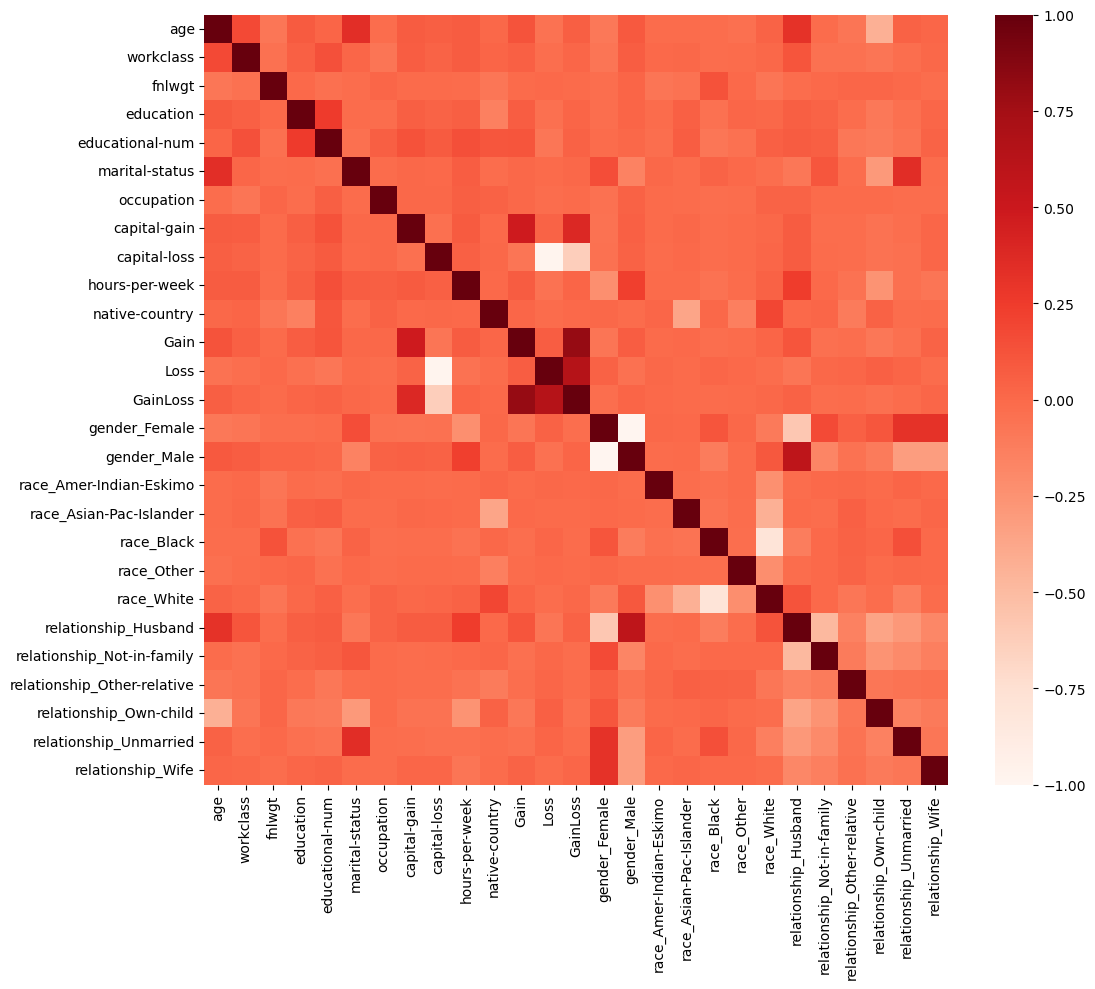

In [51]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=False, cmap=plt.cm.Reds)
plt.show()

We could also select columns on the basis of the correlation calculations, for example we could select those where the correlation is greater than some threshold value (say 0.7).

In [54]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.7:
            if columns[j]:
                columns[j] = False
selected_columns = X1.columns[columns]
data = X1[selected_columns]

In [56]:
selected_columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'Gain', 'Loss', 'gender_Female',
       'gender_Male', 'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander',
       'race_Black', 'race_Other', 'race_White', 'relationship_Husband',
       'relationship_Not-in-family', 'relationship_Other-relative',
       'relationship_Own-child', 'relationship_Unmarried',
       'relationship_Wife'],
      dtype='object')

Before you leave the lab you may spend sometime thinking about how we will put all of what we have learned together.  For example, to now go and analyse the Adult data with different classification algorithms, what steps should you apply to the data and in what order?  Do you look at missing data? outliers? balancing? FC? FS? Sampling?  Which of those do you apply to the data before spliting into train and test set and which to the train set only? 